# Workshop 3: Cleaning, Manipulating, and Exploring Data with Pandas
[Placeholder for intro materials]


In [1]:
# Import the Pandas library as pd (callable in the code as pd)
import pandas as pd

In [2]:
# Import the dataset as a DataFrame

# The file location
csv_file_url = 'https://raw.githubusercontent.com/NCSU-Libraries/data-viz-instruction/main/MI_REU_2021/data/perovskite_DFT_EaH_FormE.csv'

# Read in the file and print out the DataFrame
ts_csv = pd.read_csv(csv_file_url)
ts_csv.head()

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Empty,Empty.1,Empty.2,Empty.3,Empty.4,energy_above_hull (meV/atom),formation_energy (eV/atom)
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,29.747707,-2.113335
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,106.702335,-1.311863
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,171.608093,-1.435607
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,284.898190,-0.868639
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,270.007913,-1.746806


## Removing data
### Drop columns
Removing unnecessary columns of data using the DataFrame `drop()` method can simplify the dataset.

In [3]:
# Remove the empty columns using "drop()"
ts_csv_clean = ts_csv.drop(columns=["Empty", "Empty.1", "Empty.2", "Empty.3", "Empty.4"])

# Print out the first five records of the DataFrame
ts_csv_clean.head()

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,energy_above_hull (meV/atom),formation_energy (eV/atom)
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,29.747707,-2.113335
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,106.702335,-1.311863
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,171.608093,-1.435607
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,284.898190,-0.868639
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,270.007913,-1.746806


## Calculating new data
### Calculating with Expressions
New columns can be created based on data in other columns. For example, the new column "Number of elements" is the number of columns that represent sites that are not null.

In [6]:
# Create a new column for the number of elements found
elements_columns = ['A site #1', 'A site #2','A site #3', 'B site #1', 'B site #2', 'B site #3', 'X site']
ts_csv_clean['Number of elements'] = ts_csv_clean[elements_columns].count(axis='columns')

# Print out the new column
ts_csv_clean.head()

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,energy_above_hull (meV/atom),formation_energy (eV/atom),Number of elements
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,29.747707,-2.113335,4
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,106.702335,-1.311863,5
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,171.608093,-1.435607,4
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,284.898190,-0.868639,5
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,270.007913,-1.746806,4


### Calculating with apply functions
New columns can also be created with the `apply` method, which uses functions to handle more complex manipulations of existing data.

In [8]:
# Create a function that returns "stable" or "unstable" based on the energy above hull
def is_stable(energy_above_hull):
    # less than 40meV/atom is stable
    if energy_above_hull < 40:
        return "Stable"
    # greater than 40meV/atom is unstable
    else:
        return "Unstable"

# Create a new column
# apply the function to each row of another column to populate the new column with data
ts_csv_clean['stability'] = ts_csv_clean["energy_above_hull (meV/atom)"].apply(is_stable)

# View the dataset
ts_csv_clean

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,energy_above_hull (meV/atom),formation_energy (eV/atom),Number of elements,stability
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,29.747707,-2.113335,4,Stable
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,106.702335,-1.311863,5,Unstable
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,171.608093,-1.435607,4,Unstable
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,284.898190,-0.868639,5,Unstable
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,270.007913,-1.746806,4,Unstable
...,...,...,...,...,...,...,...,...,...,...,...,...
1924,Y8V7Co1O24,Y,NaN,NaN,V,Co,NaN,O,1.588513,-2.438274,4,Stable
1925,Y8V7Cr1O24,Y,NaN,NaN,V,Cr,NaN,O,0.000000,-2.509888,4,Stable
1926,Y8V7Fe1O24,Y,NaN,NaN,V,Fe,NaN,O,0.000000,-2.479151,4,Stable
1927,Y8V7Ni1O24,Y,NaN,NaN,V,Ni,NaN,O,0.000000,-2.441538,4,Stable


## Replacing data
Data can be replaced in a column based on conditions, similar to "find and replace." For example, this replace method replaces element abbreviations with the full element name.

In [9]:
# Replace 'Sr' and 'Ca' abbreviations with "Strontium" and "Calcium"
ts_csv_clean['A site #2'].replace({'Sr': 'Strontium', 'Ca': 'Calcium'}, inplace=True)

# Print out the updated column of data
ts_csv_clean['A site #2'].head()

0    Strontium
1           Bi
2      Calcium
3           Cd
4           Dy
Name: A site #2, dtype: object

In [11]:
# Change the element names back to their abbreviations
ts_csv_clean['A site #2'].replace({'Strontium': 'Sr', 'Calcium': 'Ca'}, inplace=True)

ts_csv_clean['A site #2'].head()

0    Sr
1    Bi
2    Ca
3    Cd
4    Dy
Name: A site #2, dtype: object

## Filtering data
### Conditional filtering
Data can be filtered using conditional statements to remove unecessary rows of data or observe a specific range of data.

In [12]:
# Filter the data to only see perovskite oxides where Calcium was found at A site #1
calcium = ts_csv_clean[ts_csv_clean['A site #1'] == 'Ca']

# Print out the filtered data
calcium

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,energy_above_hull (meV/atom),formation_energy (eV/atom),Number of elements,stability
485,Ca2La6Co8O24,Ca,La,NaN,Co,NaN,NaN,O,50.025452,-1.693684,4,Unstable
486,Ca2La6Cr8O24,Ca,La,NaN,Cr,NaN,NaN,O,0.000000,-2.297925,4,Stable
487,Ca2La6Fe8O24,Ca,La,NaN,Fe,NaN,NaN,O,0.000000,-2.034384,4,Stable
488,Ca2La6Ga8O24,Ca,La,NaN,Ga,NaN,NaN,O,73.974147,-2.173541,4,Unstable
489,Ca2La6Mn8O24,Ca,La,NaN,Mn,NaN,NaN,O,32.789931,-2.086983,4,Stable
...,...,...,...,...,...,...,...,...,...,...,...,...
616,Ca8Ni6Co2O24,Ca,NaN,NaN,Ni,Co,NaN,O,361.579777,-0.866839,4,Unstable
617,Ca8Ni7Co1O24,Ca,NaN,NaN,Ni,Co,NaN,O,378.453371,-0.824937,4,Unstable
618,Ca8Ni8O24,Ca,NaN,NaN,Ni,NaN,NaN,O,397.239965,-0.781123,3,Unstable
619,Ca8Ti8O24,Ca,NaN,NaN,Ti,NaN,NaN,O,12.448077,-2.774067,3,Stable


In [13]:
# Filter the data to only see only perovskite oxides with a formation energy greater than -1
high_fe = ts_csv_clean[ts_csv_clean['formation_energy (eV/atom)'] > -1]

# Print out the filtered data
high_fe

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,energy_above_hull (meV/atom),formation_energy (eV/atom),Number of elements,stability
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,284.898190,-0.868639,5,Unstable
41,Ba2Sr6Ni8O24,Ba,Sr,NaN,Ni,NaN,NaN,O,258.828051,-0.801693,4,Unstable
54,Ba3Cd1Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,257.075963,-0.967393,5,Unstable
59,Ba4Ba4Mn2Fe6O24,Ba,Ba,NaN,Mn,Fe,NaN,O,271.906598,-0.931270,5,Unstable
62,Ba4Ca4Co4Ni4O24,Ba,Ca,NaN,Co,Ni,NaN,O,296.095913,-0.941304,5,Unstable
...,...,...,...,...,...,...,...,...,...,...,...,...
1561,Sr8Fe1Ni7O24,Sr,NaN,NaN,Fe,Ni,NaN,O,243.428371,-0.908675,4,Unstable
1597,Sr8Ni6Co2O24,Sr,NaN,NaN,Ni,Co,NaN,O,241.664953,-0.906028,4,Unstable
1598,Sr8Ni7Co1O24,Sr,NaN,NaN,Ni,Co,NaN,O,252.767162,-0.864348,4,Unstable
1599,Sr8Ni8O24,Sr,NaN,NaN,Ni,NaN,NaN,O,263.543371,-0.822993,3,Unstable


In [16]:
# Filter the data to only see perovskite oxides where Calcium was found at A site #1 
# that also have a formation energy greater than -1
calcium_fe = ts_csv_clean[(ts_csv_clean['A site #1'] == 'Ca') & (ts_csv_clean['formation_energy (eV/atom)'] > -1)]

# Print out the filtered data
calcium_fe

# Show how many rows meet these requirements
calcium_fe.shape

(23, 12)

## Aggregating data
### Unique
The `unique()` method can be used to see the total number of unique values are in a column of data. It returns a list of each value.

In [17]:
# Create a list of the unique elements sounds at B site #3 with unique()
B3_elements = ts_csv_clean['B site #3'].unique()

# Print out the unique species
B3_elements

array([nan, 'Hf', 'Co', 'Fe', 'Cu', 'Mo', 'Ni', 'W'], dtype=object)

In [18]:
# Get the length of the new array (How many unique elements are there?)
len(B3_elements)

8

### Value counts
Value counts show how many instances there are of each unique entry in a column and returns a Series.

In [48]:
# Count the occurance of unique values on the column 'A site #2'
A2_elements = ts_csv_clean['A site #2'].value_counts()

A2_elements

Sr    162
Zn    144
Ca    143
Y     132
Ba    117
Pr    104
La     74
Ho     61
Sm     45
Gd     44
Dy     43
Nd     42
Sn     14
Cd     14
Bi     11
Mg      7
Ce      3
Er      1
Name: A site #2, dtype: int64

### Minimum, maximum, average
Aggregates like  minimum, maximum, and mean of values can be calculated in a DataFrame or Series. Examples include:

- `mean()` to find the average of a range
- `min()` to find the smallest value
- `max()` to find the largest value
- `sum()` to sum the values of a range

In [20]:
# Calculate the minimum values for each column
ts_csv_clean.min()

Material Composition            Ba1Sr7V8O24
A site #1                                Ba
B site #1                                Al
X site                                    O
energy_above_hull (meV/atom)              0
formation_energy (eV/atom)          -3.2085
Number of elements                        3
stability                            Stable
dtype: object

In [21]:
# Calculate the average mean for energy above hull
ts_csv_clean['energy_above_hull (meV/atom)'].mean()

105.53263270409896

The `agg()` method can call multiple aggregate functions at once.

In [22]:
# Calculate the minimum, maximum, and average for energy above hull
ts_csv_clean['energy_above_hull (meV/atom)'].agg(['min', 'max', 'mean'])

min       0.000000
max     956.831956
mean    105.532633
Name: energy_above_hull (meV/atom), dtype: float64

## Grouping data
`groupby()` groups data in the DataSet by column values. This grouped data can be sorted and manipulated.

In [23]:
# Group the dataset by "A site #1"
by_Asite1 = ts_csv_clean.groupby('A site #1')

# This creates a groupby object that contains information about the groups
print(type(by_Asite1))

# Find the size, or counts, of the grouped data
by_Asite1 = by_Asite1.size()

by_Asite1.sort_values()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


A site #1
Cd      1
Ho      1
Mg      1
Sn      1
Bi      4
Dy     19
Gd     19
Nd     19
Sm     19
Ca    136
Y     258
Sr    302
Pr    330
La    338
Ba    481
dtype: int64

`groupby()` can group data by multiple factors, too.

In [49]:
# Group the data by A site #1 and then A site #2 and get the mean of the remaining columns using .mean()
ts_csv_clean.groupby(['A site #1', 'A site #2']).mean()

energy_above_hull (meV/atom)  formation_energy (eV/atom)  \
A site #1 A site #2                                                             
Ba        Ba                           271.906598                   -0.931270   
          Bi                           105.932321                   -1.616462   
          Ca                           239.308297                   -1.182568   
          Cd                           142.473483                   -1.680978   
          Ce                           108.880760                   -1.700416   
...                                           ...                         ...   
Y         Ba                           275.239004                   -1.395605   
          Ca                           221.246470                   -1.484484   
          Ho                            47.305564                   -2.348126   
          Sr                           170.047628                   -1.515276   
          Zn                           121.133217                   -1.864187   

                     Number of elements  
A site #1 A site #2                      
Ba        Ba                   5.000000  
          Bi                   4.727273  
          Ca                   4.846154  
          Cd                   5.000000  
          Ce                   4.000000  
...                                 ...  
Y         Ba                   5.000000  
          Ca                   5.000000  
          Ho                   4.000000  
          Sr                   5.000000  
          Zn                   4.714286  

[69 rows x 3 columns]

## Data Visualization
Pandas can be used to create visualizations of the data, like bar charts and scatter plots. The [matplotlib visualization library](https://matplotlib.org/index.html) is an additional library that is built for creating charts.

Import the [pyplot interface](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) as `plt` to access the plotting functionality of matplotlib.

One way charts can be created is by using the matplotlib integration with pandas data structures, which calls the method [`plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) on a DataFrame or Series.

In [25]:
# Import the matplotlib pyplot interface as plt (callable in the code as plt)
from matplotlib import pyplot as plt

### Create a Bar Chart
Create a [bar graph](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) by preparing the data to visualize, storing it in a variable, and calling the `plot()` method with the keyword argument `kind='bar'`.

In [26]:
# Get the number of strike records for each species type using "A site #1"
A_site = ts_csv_clean['A site #1'].value_counts()

# Print the first 10 values
A_site.head(10)

Ba    481
La    338
Pr    330
Sr    302
Y     258
Ca    136
Gd     19
Dy     19
Sm     19
Nd     19
Name: A site #1, dtype: int64

<AxesSubplot:>

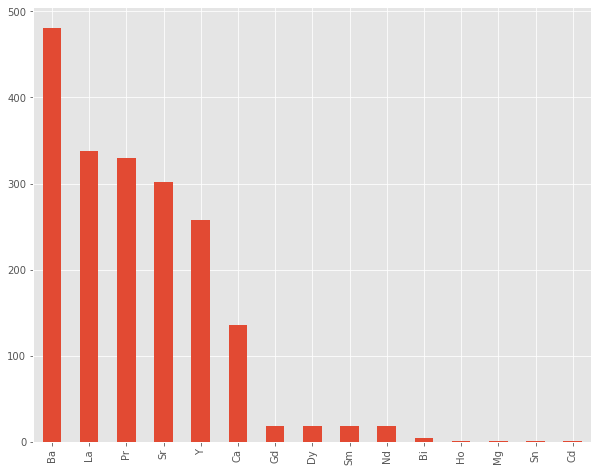

In [51]:
# Create a bar chart ("bar") with the labels (element names) along the horizontal
# axis and value counts (number of records) along the vertical axis
A_site.plot(kind='bar')

<AxesSubplot:>

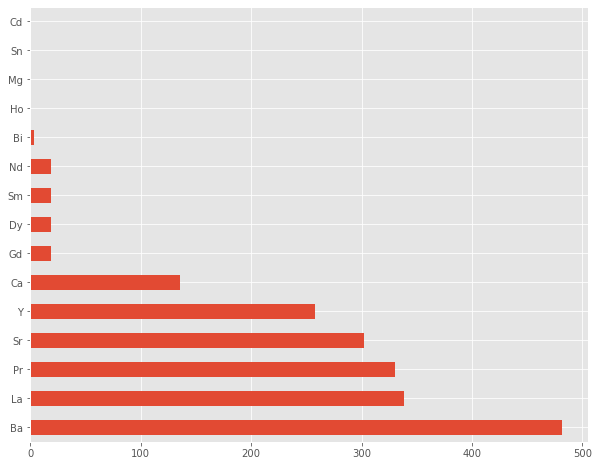

In [52]:
# Now create a horizontal bar chart ("barh") with the labels (element names) along 
# the vertical axis and value counts (number of records) along the horizontal axis
A_site.plot(kind='barh')

#### Setting global chart styles

Basic graphic global paramenters can be set for the overall [style of the plots and the size of the plots](https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html).

View examples of various styles in the [Matplotlib Style Gallery](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

In [28]:
# Set the default size of the plots to 10 inches wide and 8 inches tall
plt.rcParams['figure.figsize'] = [10,8]

In [29]:
# Set the default graphic style of the plots to 'ggplot'
# See more styles in the "Matplotlib Style Gallery"
plt.style.use('ggplot')

### Create a Scatter Plot

Create a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) by calling the `plot()` method on the DataFrame with the keyword argument `kind='scatter`. Keyword arguments `x` and `y` reference the columns in the DataFrame for the x and y axes respectively. 

<AxesSubplot:xlabel='energy_above_hull (meV/atom)', ylabel='formation_energy (eV/atom)'>

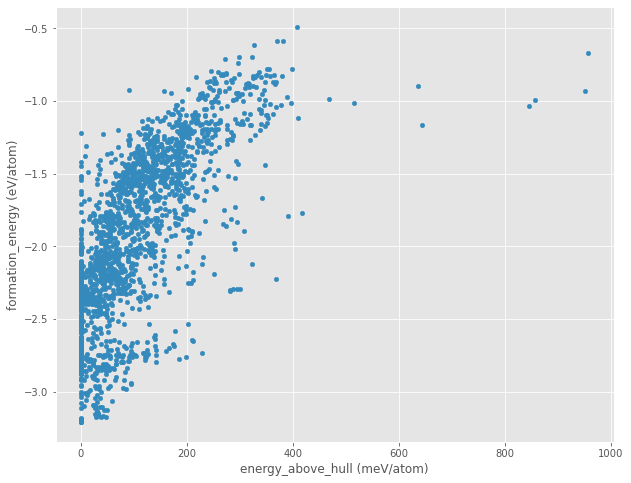

In [55]:
# Plot the energy above hull (x axis) by the formation energy (y axis)
ts_csv_clean.plot(kind="scatter", x="energy_above_hull (meV/atom)", y="formation_energy (eV/atom)")

### Set the style of the plot

The graphical encoding of the plot data can be manipulated using the keyword arguments like `c` for color and `marker` to change the style of the points. Find other style arguments for formatting markers and lines in the [matplotlib plot documentation](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html).

<AxesSubplot:xlabel='energy_above_hull (meV/atom)', ylabel='formation_energy (eV/atom)'>

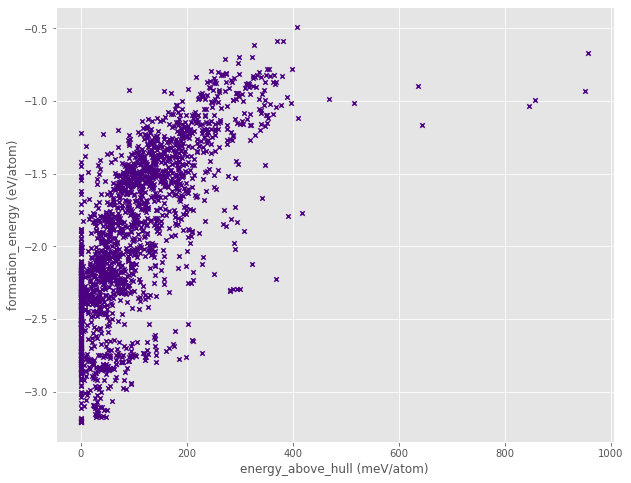

In [59]:
# Plot the energy above hull (x axis) by the formation energy (y axis)
# Add keyword arguments to change the color to #4B0082 and the marker to "x"
ts_csv_clean.plot(kind="scatter", x="energy_above_hull (meV/atom)", y="formation_energy (eV/atom)", c='#4B0082', marker="x")

To make the chart more descriptive and easy to interperet, create a plot title and axis labels. Store the plot as a matplotlib `Axes` object in a variable by calling the `plot()` method so that the methods `set_title()`, `set_xlabel()`, and `set_ylabel()` can be used on the variable to set a descriptive title, x axis label, and y axis label, respectively.

Text(0, 0.5, 'Formation Energy (eV/atom)')

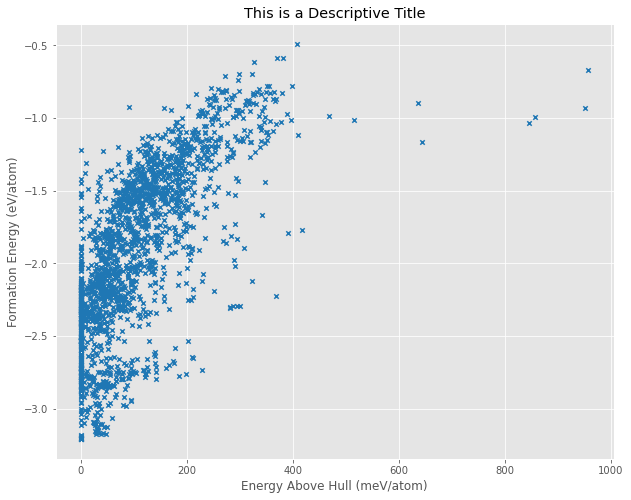

In [61]:
# Create a variable that stores the plot
scatter_plot = ts_csv_clean.plot(kind="scatter", x="energy_above_hull (meV/atom)", y="formation_energy (eV/atom)", c='#1f77b4', marker="x")

#Change titles and axis labels with set_title(), set_xlabel(), and set_ylabel()
scatter_plot.set_title("This is a Descriptive Title")
scatter_plot.set_xlabel("Energy Above Hull (meV/atom)")
scatter_plot.set_ylabel("Formation Energy (eV/atom)")

### Saving a plot

`matplotlib` provides functionality for saving a figure as an image using the method `savefig()`. To save a figure from the plot, call `get_figure` on the matplotlib `Axes` object and call the method `savefig()`.

In [ ]:
# Save the scatter plot as a png
scatter_plot.get_figure().savefig('scatter_plot.png')

# Save a high resolution png of the plot by setting a high dpi
scatter_plot.get_figure().savefig('scatter_plot_2.png', dpi=300)

# Save a vectorized version of the plot (svg)
scatter_plot.get_figure().savefig('scatter_plot_3.svg')

### Other Data Visualization Libraries

`matplotlib` is not the only option for creating data visualizations, there are other libraries that offer additional styling and interactive options.

#### Line Chart (Seaborn)

Seaborn is a common visualization library that builds on matplotlib and provides more robust options. Learn more and find documentation on the [seaborn website](https://seaborn.pydata.org/)

In [43]:
# Import the Seaborn library as sns (callable in the code as sns)
import seaborn as sns

<AxesSubplot:xlabel='energy_above_hull (meV/atom)', ylabel='Count'>

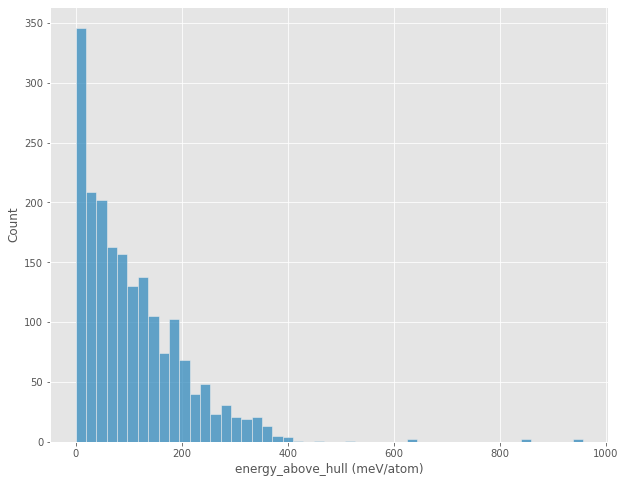

In [47]:
# Create a histogram by calling histplot() in Seaborn
sns.histplot(ts_csv_clean['energy_above_hull (meV/atom)'])